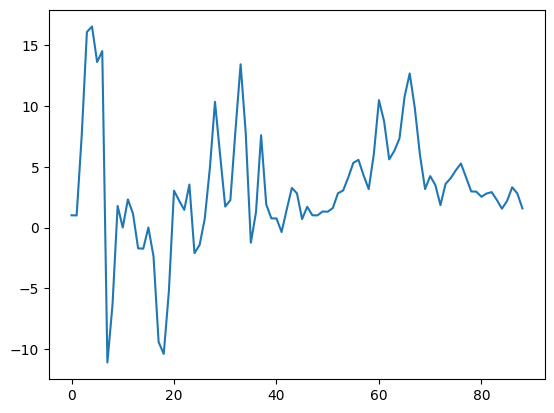

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
import warnings
warnings.filterwarnings("ignore")

datos = pd.read_csv('Modelo AR datos.csv', sep=";",decimal=",")
yy = datos.iloc[:,1]

y = yy[0:89] # leave the last 6 observations to compare with the forecasted values

plt.plot(y)
plt.show()

# print(y.mean())

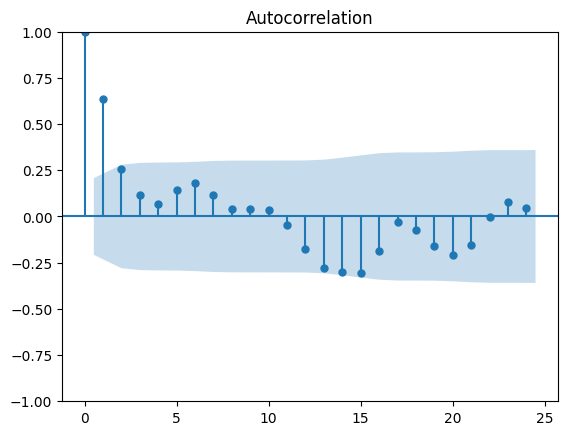

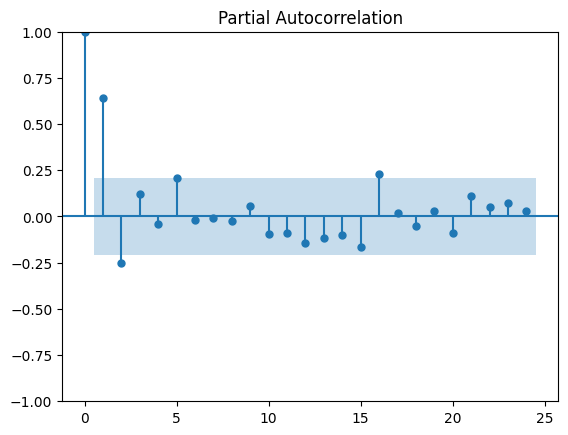

In [27]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

nlags = 24 # play with this parameter

plot_acf(y, lags = nlags)
plt.show()

plot_pacf(y, lags = nlags,method="ols")
plt.show()

In [28]:
import statsmodels as sm

# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)


adf_test = sm.tsa.stattools.adfuller(y,maxlag=10) 
print("adf_test") # first output "The test statistic", second output "p-value"
print("Statistic:" , adf_test[0])
print("p-value:" , adf_test[1])

adf_test
Statistic: -3.1137167859379775
p-value: 0.02555459814807376


                               SARIMAX Results                                
Dep. Variable:              Inflation   No. Observations:                   89
Model:                 ARIMA(2, 0, 0)   Log Likelihood                -242.039
Date:                Wed, 12 Nov 2025   AIC                            492.077
Time:                        17:18:19   BIC                            502.032
Sample:                             0   HQIC                           496.090
                                 - 89                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          3.2221      1.049      3.071      0.002       1.166       5.279
ar.L1          0.7930      0.085      9.298      0.000       0.626       0.960
ar.L2         -0.2471      0.094     -2.636      0.0

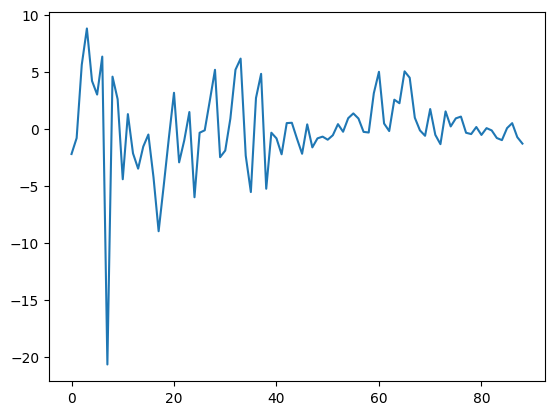

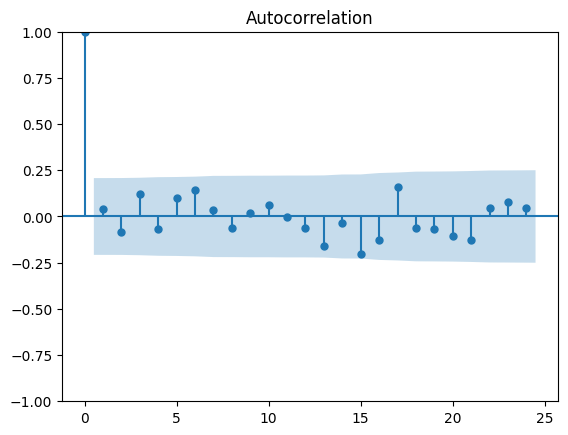

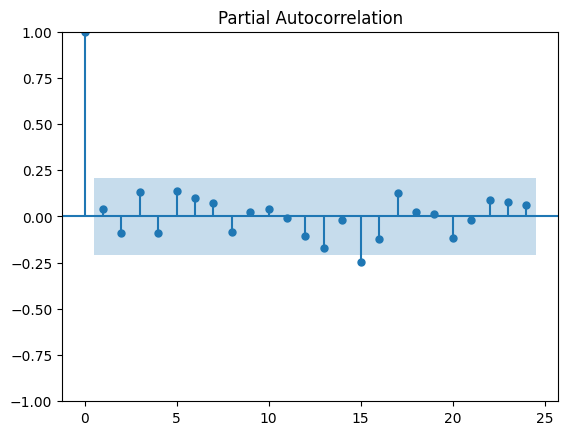

In [29]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fit = ARIMA(y, order=(2,0,0))
fit_fit = fit.fit()
print(fit_fit.summary())


residuos=fit_fit.resid

plt.plot(residuos)
plt.show()
plot_acf(residuos, lags = nlags)
plt.show()
plot_pacf(residuos, lags = nlags)
plt.show()

# Gracias a los resultados mostrados abajo podemos ver que nuestra predición es: yt = 3.22 + 0.79yt-1 - 0.25yt-2 + at.
# Además vemos que como p>|z| es 0.002 y 0.008 sabemos que al ser p<0.05, rechazo H0 y por lo tanto asumo H1, es decir las constantes no son 0.
# Significando este que t depende de t-1 y de t-2.

LjungBox       lb_stat  lb_pvalue
20  21.314572   0.378829
Shapido ShapiroResult(statistic=np.float64(0.8471419318099851), pvalue=np.float64(3.83281817774346e-08))


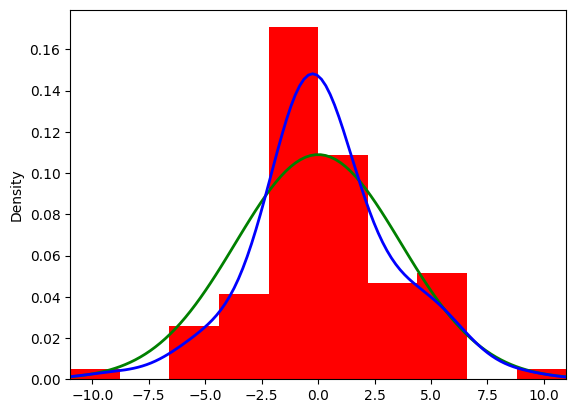

In [30]:
# Box test

import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(residuos, lags=[20])

print("LjungBox", box_test) # first output "The test statistic", second output "p-value"

from scipy.stats import shapiro
import seaborn as sns
import scipy.stats as st

# Normality residuos test

saphiro = shapiro(residuos)
print("Shapido", saphiro) # first output "The test statistic", second output "p-value"

mean = np.mean(residuos)
std = np.std(residuos)
mu = np.mean(residuos)
sigma = np.std(residuos)
x = np.linspace(mu -3*sigma, mu +3*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(residuos,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(residuos, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 3*std, mean + 3*std)

plt.show()

# Gracias a los siguientes resultados vemos que el pvalor es muy grande por lo tanto rechazo H1 es decir asumo H0 y puedo asumir que
# mis residuos son ruido blanco

point predictions
0    2.013691
1    2.672265
2    3.084591
3    3.248876
4    3.277291
5    3.259238
Name: predicted_mean, dtype: float64


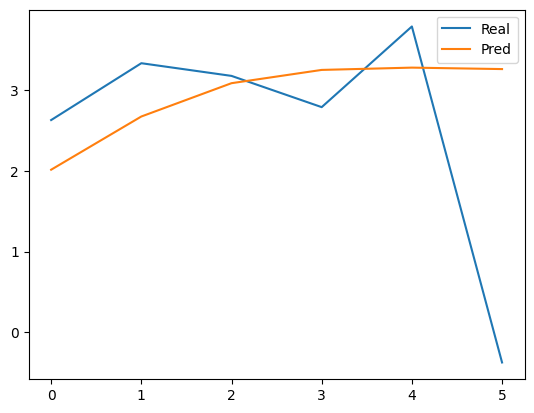

In [31]:
# y_pred, stderr, conf_int = fit_fit.forecast(steps=6, alpha=0.05) 
y_pred = fit_fit.forecast(steps = 6)
y_pred = y_pred.reset_index(drop=True)
real =yy[-6:].reset_index(drop=True)
error = y_pred - real

print("point predictions")
print(y_pred)

plt.plot(real, label = 'Real')
plt.plot(y_pred, label = 'Pred')
plt.legend()
plt.show()

In [32]:
# MORE FORECAST INFORMATION

forecast_result = fit_fit.get_forecast(steps=6)
y_pred = forecast_result.predicted_mean # point predictions
conf_int = forecast_result.conf_int(alpha=0.05)  # confidence intervals around point predictions
stderr = forecast_result.se_mean  # predictions standard errors

print("point predictions")
print(y_pred)

print("standard error of point predictions")
print(stderr)

print("confidence intervals around point predictions")
print(conf_int)

point predictions
89    2.013691
90    2.672265
91    3.084591
92    3.248876
93    3.277291
94    3.259238
Name: predicted_mean, dtype: float64
standard error of point predictions
89    3.658226
90    4.668952
91    4.873445
92    4.889109
93    4.889234
94    4.890816
Name: var_pred_mean, dtype: float64
confidence intervals around point predictions
    lower Inflation  upper Inflation
89        -5.156300         9.183682
90        -6.478713        11.823243
91        -6.467184        12.636367
92        -6.333601        12.831353
93        -6.305432        12.860014
94        -6.326585        12.845060


In [33]:
2.013691-1.96*3.658226

-5.156431959999999

In [34]:
2.013691+1.96*3.658226

9.18381396

In [35]:
print("Llegó")

Llegó


EJERCICIO PROPUESTO: SUMAR LANDA, METER LOGARITMO PARA TRANSFORMAR, DESTRANSFORMAR Y COMPARAR CON LO DE ARRIBA